# Determining the Price of a Car Trhough Historical Data Analysis

## Table of Contents
- [Data Acquisition](#data_acquisition)
- [Data Pre-Processing](#data_preprocessing)
- [Exploratory Data Analysis](#eda)
- [Model Development](#model-development)
- [Conclusions](#conclusions)

## <a name="data_acquisition"> Data Acquisition </a>
The dataset to be used in this project is in .csv format and it's stored online.
- Data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>
- Data type: csv

In [1]:
# import libraries
import pandas as pd
import numpy as np

### Read the file
I use the <code>pd.read_csv()</code> method to read the csv file. Since the original file doesn't include headers, I specify the argument <code>headers = None</code>.

In [2]:
# Read the online file by the URL provides above, and assign it to variable "df"
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(path, header=None)

In [3]:
# Show the first 5 rows using df.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## <a name="data_preprocessing"> Data Pre-Processing </a>
- add headers
- substitute "?" symbol with <code>np.NaN</code>
- evaluate for missing data
- replace missing values by mean

### Add Headers
Since the headers are not present in the original csv file, I add them manually. The information about the columns meaning can be found at: 
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# replace the headers
df.columns = headers
# check the dataframe
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Dealing with Missing Data
In this section I prepare the dataset for further analysis by converting missing data to values that are actually useful for the objective analysis. The idea is to identify missing data and to apply the mos suitable strategy to deal with that. The possible strategies, that can be applied to this particular dataframe, are:
- replace by mean: to be used when just a minority of the data entries for a column is missing and when the field is a continuous one
- replace by frequency: to be used when just a minority of the data entries for a column is missing and when the field is a categorical/non continuous one
- drop the whole data point: since the ultimate goal of the current analysis it to predict the price value, I drop data point where the price value is missing since they cannot be used for the prediction

#### Replace misssing values with NaN
Missing values in the current dataframe are stated with "?" symbol. I provide to replace them with <code>np.NaN</code> value.

In [5]:
# replace "?" with NaN
df=df.replace('?',np.NaN)

#### Count missing values
Through a loop I count the number of missing values in each column.

In [6]:
# get a boolean value indicating whether the value is missing
missing_data = df.isnull()
# count missing data for each column
for column in missing_data.columns.values.tolist():
    print("Column name:", column)
    print (missing_data[column].value_counts())
    print("")

Column name: symboling
False    205
Name: symboling, dtype: int64

Column name: normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

Column name: make
False    205
Name: make, dtype: int64

Column name: fuel-type
False    205
Name: fuel-type, dtype: int64

Column name: aspiration
False    205
Name: aspiration, dtype: int64

Column name: num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

Column name: body-style
False    205
Name: body-style, dtype: int64

Column name: drive-wheels
False    205
Name: drive-wheels, dtype: int64

Column name: engine-location
False    205
Name: engine-location, dtype: int64

Column name: wheel-base
False    205
Name: wheel-base, dtype: int64

Column name: length
False    205
Name: length, dtype: int64

Column name: width
False    205
Name: width, dtype: int64

Column name: height
False    205
Name: height, dtype: int64

Column name: curb-weight
False    205
Name: curb-weight, dtype: int64

Column name: eng

I can see that data are missing in the following columns:
- **normalized-losses**: 41 missing values, replace with mean
- **num-of-doors**: 2 missing data, replace with frequency
- **bore**: 4 missing data, replace with mean
- **stroke**: 4 missing data, replace with mean
- **horsepower**: 2 missing data, replace with mean
- **peak-rpm**: 2 missing data, replace with mean
- **price**:  4 missing data, delete the entire data points

Since the fields "normalized-losses", "bore", "stroke", "horsepower" and "peak-rpm" are continuous ones and since most of the values are present, I can replace the missing values with the mean of that field.
Being the field "num-of-doors" a non-continuous one, I can replace the missing values with the most frequent value.
Finally, being the "price" field the target field of the analysis, I chose to drop the entire data points where the "price" value is missing since they are not useful for prediction.

#### Replace values by mean

In [7]:
# calculate the mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore = df["bore"].astype("float").mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis=0)
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)

# replace NaN values with the mean value
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

#### Replace values by frequency

In [8]:
# count the different values in the field
df['num-of-doors'].value_counts()

# get the index of the most common value
df['num-of-doors'].value_counts().idxmax()

# replace NaN values with the most frequent value
df["num-of-doors"].replace(np.nan, "four", inplace=True)

#### Drop data points where "price" value is missing

In [9]:
# drop missing values in the "price" column
df=df.dropna(subset=["price"], axis=0)
# reset the row index
df.reset_index(drop=True, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


### Correct data format
- get the data type stored in each column
- correct the data type where it's incorrect
- get a statistical description of each column

#### Get the data type stored in the columns

In [10]:
# get data type of the columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Convert the incorrect data types
Some of the columns have an incorrect data type. Since this may prevent to apply functions during further analysis I correct the data types.

In [11]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### Check that all data types are now correct

In [12]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Get a statistical summary of the numerical columns

In [13]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Normalization
In order to fairly compare different features I need to normalize the data. This is also mandatory for some regression algorithms. I normalize using the "Simple feature scaling" technique data so that the value ranges from 0 to 1.

In [14]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

### Binning
The feature "horsepower" contains continuous numerical values. For the analysis I chose to consider the price difference between cars with high, medium and low horsepower.

In [15]:
# Convert data to correct format
df["horsepower"]=df["horsepower"].astype(int, copy=True)

#### Generate Bins Limits

In [16]:
# use np.linspace to generate the bins limits
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
# set the group names
group_names = ['Low', 'Medium', 'High']

#### Assign Values to Bins

In [17]:
#create a new feature and use the method pd.cut
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


#### Bins Visualization

In [18]:
# see the number of values in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

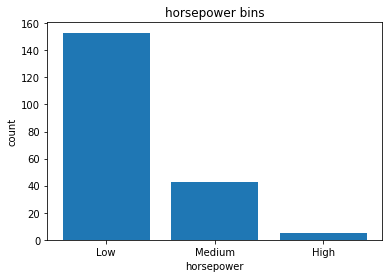

In [19]:
# visualize the bin cardinality
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Convert Categorical Values to Numerical Values
In order to apply a regression model I need to convert categorical values, such as the column "fuel-type", to dummy numerical values.

#### Create Dummy Variables

In [20]:
# get the indicator variables
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_2 = pd.get_dummies(df["aspiration"])
# change the column names
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)

#### Merge Original Dataframe with Dummy Variables

In [21]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
df = pd.concat([df, dummy_variable_2], axis=1)
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.drop("aspiration", axis = 1, inplace=True)

In [22]:
# preview the modified dataframe
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


## <a name="eda"> Exploratory Data Analysis </a>
The preliminary step of Exploratory Data Analysis (EDA) is carried on in order to:
- summarize the main characteristics of the data
- gain better understanding of the data set
- uncover relationships between variables
- extract important variables

Overall the main question to be answered in this preliminary phase of the project is "which features have the most impact on the car final price?".

### Continuous Variables 
In this section I use statistical tools to better understand the correlation of each continuous numerical feature with respect to the target variable "price".

#### Correlation Matrix

In [23]:
# extraciton of correlation matrix
correlation_matrix = df.corr()
corr_price = correlation_matrix[['price']].sort_values(by='price', ascending=False, inplace=False)
corr_price

,price
price,1.000000
engine-size,0.872335
curb-weight,0.834415
horsepower,0.809607
width,0.751265
length,0.690628
wheel-base,0.584642
bore,0.543155
aspiration-turbo,0.179578
height,0.135486


#### Regression Plot
In order to visualize the correlation of continuous variables to the target variable "price", I plot a scatter plot of the data points fitted by a linear regression model.

Seaborn library is used to achieve this task.

(0.0, 53512.02762336347)

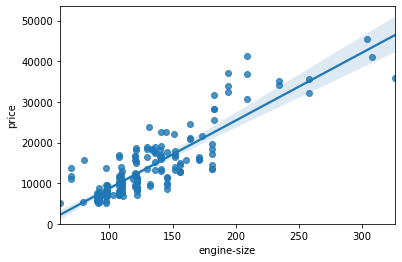

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# engine size as potential predictor variable of price
eng_size_corr = sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

The above plot shows a strong correlation between the variables "engine-size" and "price". The correlation between these two variables is considerably high.:

In [25]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 47513.40567872161)

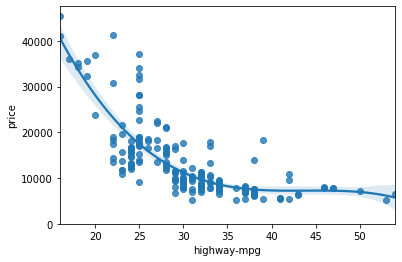

In [26]:
# fuel consumption on highway as potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df, order=3)
plt.ylim(0,)

Analogously, I visualize the regression plot of the variables "highway-mpg" and "price". The above plot shows an inverse relationship between these two variables. Here a 3rd order polynomial interpolation is found to better fit the data cloud. 

The correlation value has an high absolute value:

In [27]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As I did above, I verify that the variable "stroke" has a low correlation to the target variable "price":

<AxesSubplot:xlabel='stroke', ylabel='price'>

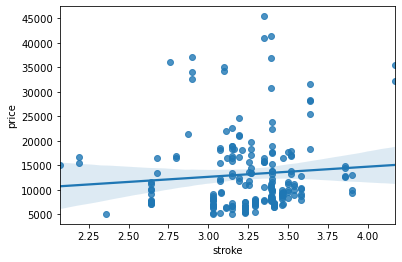

In [28]:
# stroke as potential predictor variable of price
sns.regplot(x="stroke", y="price", data=df)

In [29]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


#### Pearson Correlation
Given the necessity to know the statistical significance of a correlation measurement, I use Pearson Correlation to extract the p-value associated to each correlation coefficient.

In [30]:
# import required library
from scipy import stats

##### Wheel-Base vs. Price
Although it's statistically significant (due to the low P-value), the correlation between wheel-base and price isn't strong.

In [31]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


##### Horsepower vs. Price
The correlation between horsepower and price is both strong and statistically significant.

In [32]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


In [33]:
# define numeric types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# isolate numeric features
numeric_df = df.select_dtypes(include=numerics)
# create dataframe for storing Pearson Correlation Coefficient and P-value
pears_col_name = ['Feature (vs. price)','Pearson Correlation Coefficient','P-value']
pears_df = pd.DataFrame(columns=pears_col_name, index=range(len(numeric_df.columns)))
for i in range(0,len(numeric_df.columns)):
    pearson_coef, p_value = stats.pearsonr(numeric_df.iloc[:,i], df['price'])
    pears_df.iloc[i,0] = numeric_df.columns[i]
    pears_df.iloc[i,1] = pearson_coef
    pears_df.iloc[i,2] = float(p_value)
    #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
#     print(numeric_df.columns[i])



In [34]:
pd.set_option('display.float_format', '{:.2E}'.format)
pears_df

,Feature (vs. price),Pearson Correlation Coefficient,P-value
0,symboling,-8.24E-02,2.45E-01
1,normalized-losses,1.34E-01,5.79E-02
2,wheel-base,5.85E-01,8.08E-20
3,length,6.91E-01,8.02E-30
4,width,7.51E-01,9.20E-38
5,height,1.35E-01,5.51E-02
6,curb-weight,8.34E-01,2.19E-53
7,engine-size,8.72E-01,9.27E-64
8,bore,5.43E-01,8.05E-17
9,stroke,8.23E-02,2.46E-01


Given the above table, I can conclude that the significant continuous variables to be taken into account for determining the car price are:
- Length
- Width
- Curb weight
- Engine size
- Horsepower
- City mpg
- Highway mpg
- Wheel base
- Bore

### Categorical Variables
As regards the categorical variables, I chose display boxplots to show the relationship of such variables to the target variable "price".

#### Boxplot

<AxesSubplot:xlabel='body-style', ylabel='price'>

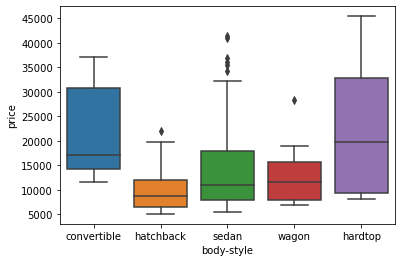

In [35]:
# body style as potential predictor variable of price
sns.boxplot(x="body-style", y="price", data=df)

Considering the significant overlapping between different body styles, I conclude that "body-style" is not a good predictor of "price".

<AxesSubplot:xlabel='engine-location', ylabel='price'>

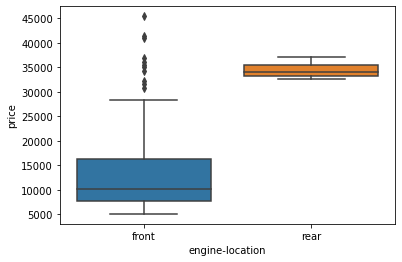

In [36]:
# engine location as potential predictor variable of price
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

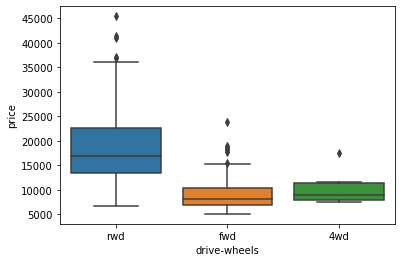

In [37]:
# drive wheels as potential predictor variable of price
sns.boxplot(x="drive-wheels", y="price", data=df)

The two boxplots above show that both "engine-location" and "drive-wheels" could potentially be good predictors of the target variable "price". It's in fact evident that the category of such variables plays an important role in determining the price. As regards drive wheels modality, there is no particular impact on price between front wheels dive and four wheels drive cars. There is however a significant difference between the rear wheel drive category and the other two.

#### Value Counts
In order to determine if a potentially good predictor can effectively been used in my model, it's important to understand how many units of each category is available.

In [38]:
# count the units of drive-wheel and convert them to a dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [39]:
# count the units of engine-location and convert them to a dataframe
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


After counting the units of each category for "engine-location", it's evident that it can't be a good predictor variable for "price" since to few "rear" data points are present.

#### Heatmap
In order to graphically visualize the impact of categorical variables on price I can extract a grouped pivot table and display it as a heatmap.

In [40]:
# group by 'drive-wheels' and 'body-style' and compute the average price of each unique combination
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7.60E+03
1,4wd,sedan,1.26E+04
2,4wd,wagon,9.10E+03
3,fwd,convertible,1.16E+04
4,fwd,hardtop,8.25E+03
5,fwd,hatchback,8.40E+03
6,fwd,sedan,9.81E+03
7,fwd,wagon,1.00E+04
8,rwd,convertible,2.39E+04
9,rwd,hardtop,2.42E+04


It's easier to visualize the above table when converted to a pivot table:

In [41]:
# convert the grouped values to a pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                     
body-style   convertible  hardtop hatchback    sedan    wagon
drive-wheels                                                 
4wd             0.00E+00 0.00E+00  7.60E+03 1.26E+04 9.10E+03
fwd             1.16E+04 8.25E+03  8.40E+03 9.81E+03 1.00E+04
rwd             2.39E+04 2.42E+04  1.43E+04 2.17E+04 1.70E+04

The above data has more impact when visualized graphically. For this reason I plot a heatmap displaying the effect on price of the two chosen categorical variables.

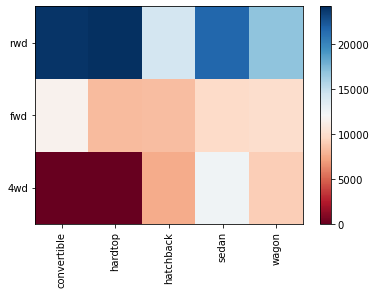

In [42]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### ANOVA
In order to measure the dependency of a the categorical variable "drive-wheels" to the target variable "price", I use the ANOVA method.
It tests the null hypothesis that the variables are independent and it returns:
- F-test score: assuming that the mean values of each group is the same, it represents how much the actual mean values deviate from the assumption. A large F-test score value means that the variables are dependent.
- P-value: it represents the statistical significance of the F-test score.

In [43]:
# group the data for the variable drive-wheel
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

In [44]:
# Perform the ANOVA test
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


I can see that the variable "drive wheels" is correlated to the target variable "price" with very high statistical significance.
Given the above boxplot it's interesting to check if I get the same results examining the groups separately. In particular, from the above box plot it seems that there isn't particular difference on price whether a car is front wheels drive or four wheel drive.

In [45]:
# perform the ANOVA test for groups separately
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price']) 
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


According to the assumption above, the ANOVA test states that there is no evidence that "drive wheels" variables restricted to "fwd" and "4wd" is associated to the price value.
Still, we can confidently assume that the "drive-wheels" feature is to be taken into account to determine the car price.

### EDA - Conclusions

Based on the above graphs and the correlation/association tests (Pearson Correlation for continuous variables and ANOVA test for categorical variables), I can confidently isolate the following variables as correlated to the car price:

Continuous variables:
- Length
- Width
- Curb weight
- Engine size
- Horsepower
- City mpg
- Highway mpg
- Wheel base
- Bore

Categorical variables:
- Drive wheels

## <a name="model-development"> Model Development </a>

In this section I develop different models that predict the price of the car using the predictor variables identified in the previous section. The different models are then compared to eachother through some numerical measure and through visualization.

### Train & Test Set
In order to perform an out-of-sample model evaluation, I split the original dataframe into a training set and a testing set. This will allow to assess the effectiveness of the developed model in a real world scenario. In fact, testing the model using the same dataset on which the model was trained with (i.e. in-sample evaluation) might result in high evaluation scores even if the model is overfitted.
To prevent overfitting an out-of-sample evaluation approach is recommended. 

In this case the test dataset is chosen to contain 10% of all the datapoints present in the original dataset.

In [46]:
# dependent/target variable
y_data = df['price']
# independent/predictor variables
x_data=df.drop('price',axis=1)

In [47]:
# import the required library
from sklearn.model_selection import train_test_split

# split the original dataframe in a training and a testing subset, the test subset has 10% of the original datapoints
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])


Number of test samples : 21
Number of training samples: 180


### Multiple Linear Regression
I develop a Multiple Linear Regression model to predict the target variable "price" given the values of the independent variables "horsepower", "curb-weight", "engine-size" and "highway-mpg".

In [48]:
# import the required library
from sklearn.linear_model import LinearRegression
# create a liner regressio object
lr = LinearRegression()
# fit the linear regression object with the train samples
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

#### Test the Model
The developed model is tested in the following ways:
- computing the R^2 Score
- computing the Cross-Validation Score
- plotting the Distribution Plot

In [49]:
# compute the R^2 Score of the model using the testing set
print("The R^2 Score of the model using the testing set is: ", lr.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

The R^2 Score of the model using the testing set is:  0.6070162474078092


The R^2 Score computed considering the training dataset is much higher than the metrics computed with the testing set:

In [50]:
# compute the R^2 Score of the model using the training set
print("The R^2 Score of the model using the training set is: ", lr.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train))

The R^2 Score of the model using the training set is:  0.8142658273861367


Now I use Cross-Validation to compute an evaluation metrics of the linear regression model. I use 4 folds to validate the model.

In [51]:
# import the required library
from sklearn.model_selection import cross_val_score
# perform Cross-Validation inputing the model, the independent features, the target variable and the number of folds
Rcross = cross_val_score(lr, x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data, cv=4)
print("The mean R^2 Score of the folds is", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean R^2 Score of the folds is 0.6645536687394081 and the standard deviation is 0.156232358044787


Finally, I want to visualize the gap between the prediction and the actual values through a Distribution Plot.

In [52]:
# defining the function for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    import warnings
    warnings.filterwarnings("ignore")
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [53]:
# prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
# prediction using testing data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

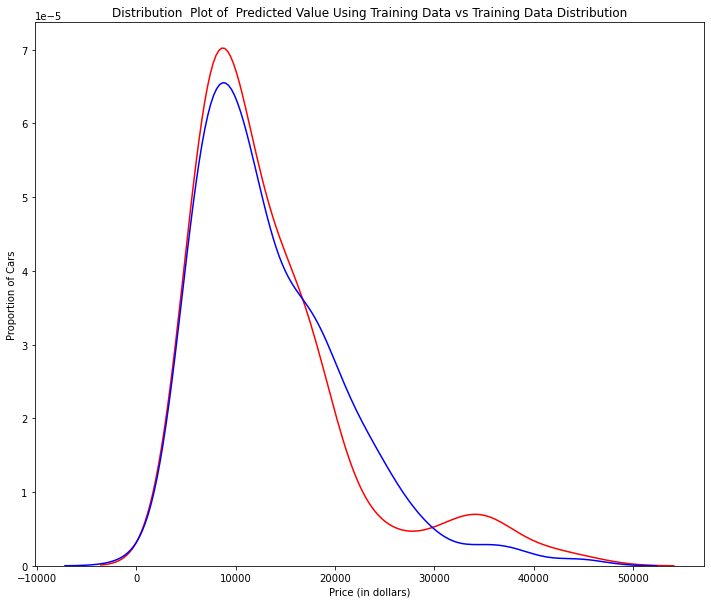

In [54]:
# plot the Distribution Plot of training data vs. predicted values using training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

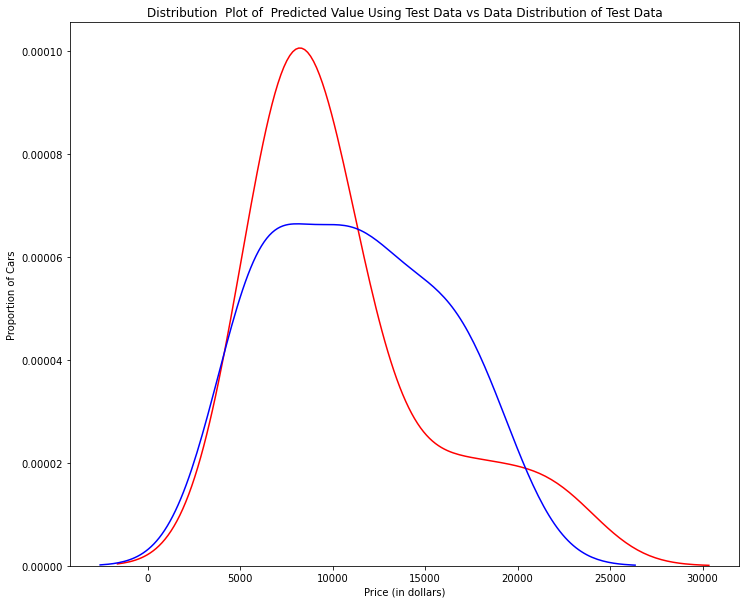

In [55]:
# plot the Distribution Plot of testing data vs. predicted values using testing data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing the two figures I notice that the distribution of the training data is much better at fitting the data than the one of the testing data. The main difference between the distributions is at a price range of 5,000 to 15,000.

### Polynomial Regression
Given the not satisfactory efficiency of the Linear Regression model, I develop a Polynomial Regression model to predict the target variable "price" given the values of the independent variables "horsepower", "curb-weight", "engine-size" and "highway-mpg".

In [56]:
# import the required library
from sklearn.preprocessing import PolynomialFeatures

# split the original dataframe in a training and a testing subset, the test subset has 45% of the original datapoints
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [57]:
# create a polynomial feature object of degree 3
pr = PolynomialFeatures(degree=3)
# perform a polynomial transform on the independent variables on the test and train sets
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [58]:
# create a linear regression model
poly = LinearRegression()
# train the linear regression model with the polynomial transformed variables 
poly.fit(x_train_pr, y_train)

LinearRegression()

In [59]:
# use the polynomial regression model to predict the price values on the testing set
yhat = poly.predict(x_test_pr)

In [60]:
# compare some predictions with the actual values
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ -405.16728182  3858.65715414 57900.36661392 25152.03730278]
True values: [ 6295. 10698. 13860. 13499.]


I can see that the predicted valiues differ from the true values. I proceed by computing the R^2 Score of the model both using the training set and the testing set.

In [61]:
#compute the R^2 score of the polynomial model using the training set
poly.score(x_train_pr, y_train)

0.7269185456059593

In [62]:
#compute the R^2 score of the polynomial model using the training set
poly.score(x_test_pr, y_test)

-31.571857505719997

The R^2 Score on the testing set not only is much lower than the one on the training set, it's negative. This is a clear sign of overfitting.

In the followinc cell I execute a loop to find which is the best degree for the Polynomial fitting (i.e. the one that outputs the higher R^2 Score).

[0.7844353209813029, 0.60448704415953, -31.571857505719997, -636.8907636325906]
Optimal order for polynomial interpolation:  1 corresponding to a R^2 Score of:  0.7844353209813029


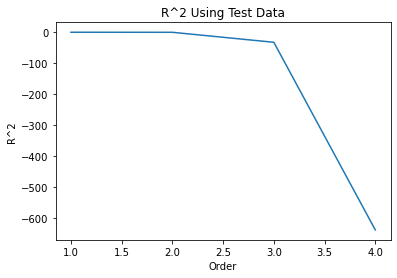

In [63]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

#print(max(Rsqu_test))
max_value = max(Rsqu_test)
max_index = Rsqu_test. index(max_value) 
print(Rsqu_test)
print("Optimal order for polynomial interpolation: ", order[max_index], "corresponding to a R^2 Score of: ", Rsqu_test[max_index])

### Ridge Regression
Given the overfitting problem obtained with a Polynomial Regression Model of degree 3 and given the R^2 score of a Polynomial model of degree 2, I can try to develop a Ridge Regression for a polynomial fit of degree 2 and apply Ridge Regression to it.

In [64]:
# # create a polynomial feature object of degree 2
pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# import the required library
from sklearn.linear_model import Ridge

In order to select the optimal free parameter alpha for the Ridge Regression model I use the method of grid search in order to scan through different values quickly.

In [65]:
# import the required library
from sklearn.model_selection import GridSearchCV
# difine the array of possible parameters
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
# create a ridge object
RR=Ridge()
# create a grid object with the ridge model, the parameters array, the number of folds for the cross-validation
Grid1 = GridSearchCV(RR, parameters1,cv=4, iid=None)
# fit the model with the independent variables
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
# identify the best estimator
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

The best value of alpha (from the ones contained in the parameters array) is 1,000.

I proceed by computing the R^2 Score of the model using the testing set.

In [66]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793232

The obtained value is higher than the one obtained for Multiple Linear Regression and for Polynomial Regression.

It can be significant to visualize the Distribution Plot for the Ridge Regression with alpha = 1,000.

In [67]:
yhat_test = BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

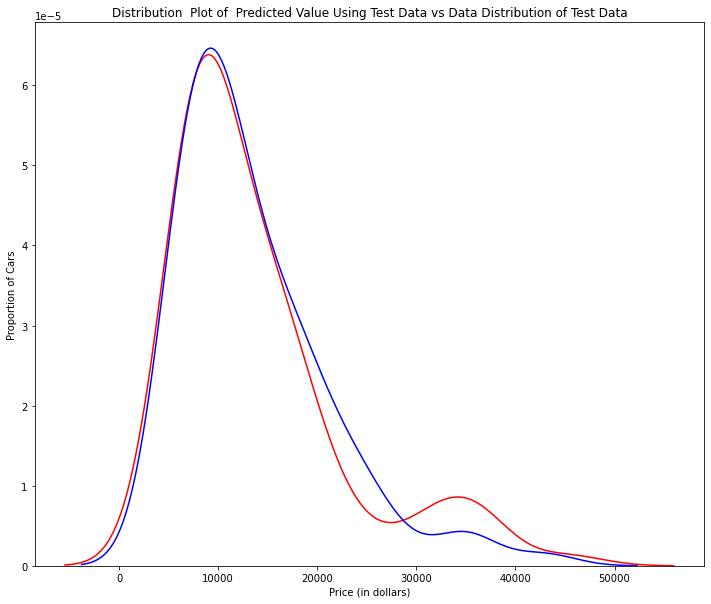

In [68]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## <a name="conclusions"> Conclusions </a>

The aim of this project was to develop a Machine Learning model to predict the fair price of a car given its characteristics. 

Different steps have been performed in order to clean the original dataset and to isolate the most significant variables. In fact, many of the independent variables were not correlated with the target variable "price".

Finally, different Machine Learning models were developed and tested through both visualization and numerical evaluation methods. Ultimately, a Ridge Regression model with the parameter "alpha" of value 1,000 was selected as the most suitable model for determining the car price given the car's characteristics.